# ECON 5314
# PCA and Factor Analyis

**Ali Haidari**  

**alih**

**4/14/2023**

--- --- ---

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1) Data Preprocessing
--- --- ---

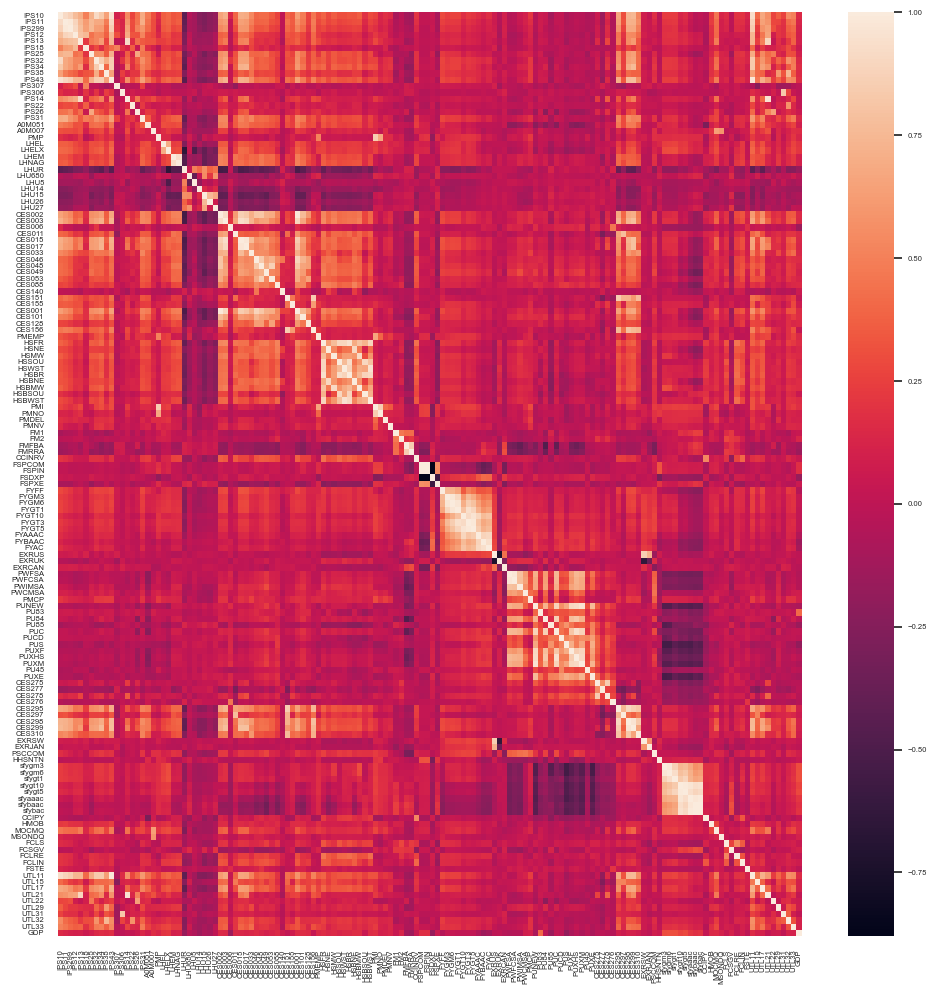

In [66]:
macro_dat = pd.read_csv("MacroDataset.csv")
#correlation heatmap of the macro economics data
plt.figure(figsize=(12, 12))
sns.set(font_scale=0.5)
sns.heatmap(macro_dat.corr(), xticklabels=True, yticklabels=True);

In [67]:
#split data into training and testing
split_obs = 50
test_macro = macro_dat.tail(n=split_obs)
train_macro = macro_dat.head(n=len(macro_dat.index)-split_obs)

### 2) Principal Component Analysis
--- --- ---

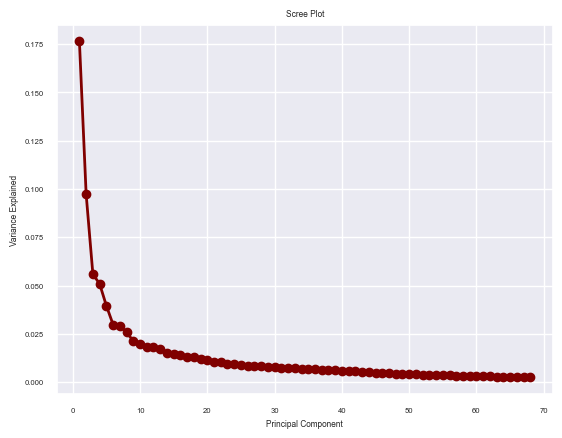

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#normalizaing the data before we begin analysis
sc = StandardScaler()
x_train = sc.fit_transform(train_macro)
x_test = sc.transform(test_macro)


#PCA object with 0.95 percent threshold for explained variance within components
pca = PCA(n_components = 0.95)

#fit PCA model to data
pca_fit = pca.fit(x_train)

#scree plot for explained variance ratio
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='maroon')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

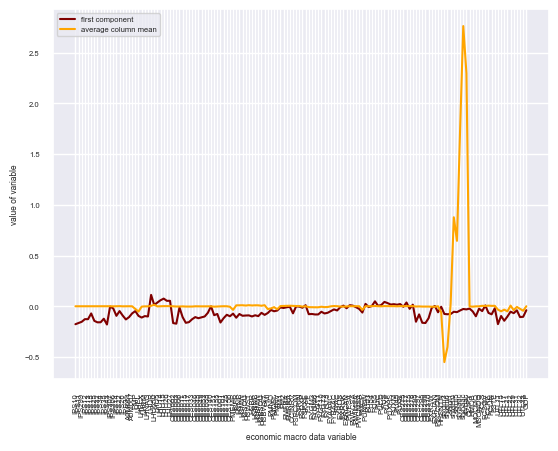

In [69]:
first_component = pca.components_[0]
col_means = macro_dat.mean(axis=0)

plt.plot(col_means.index, first_component, c= "maroon")
plt.plot(col_means.index, col_means, c = "orange")
plt.xlabel("economic macro data variable")
plt.ylabel("value of variable")
plt.xticks(rotation='vertical')
plt.legend(['first component', 'average column mean'])
plt.show()

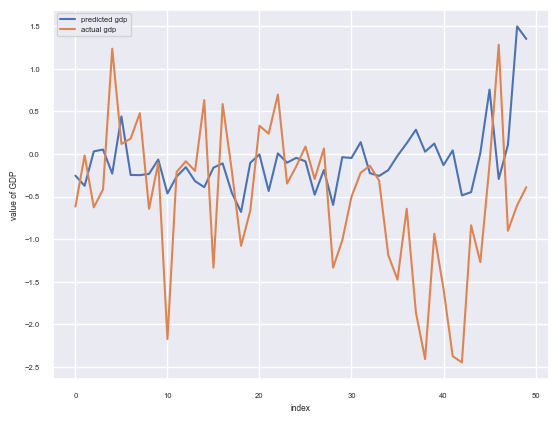

In [70]:
from sklearn.linear_model import LinearRegression

comp_df = pd.DataFrame(pca.components_)
 
#first n components used to predict the GDP of the test set
n_comp = 10
x_train_reduced = comp_df.iloc[:n_comp, :143 ]
y_train_reduced = comp_df.iloc[:n_comp, 143]

#regress to predict the next 50 GDP observations
regr = LinearRegression()
regr.fit(x_train_reduced, y_train_reduced)
x_test_reduced = pd.DataFrame(x_test).iloc[:, 0:143]

#calculation for actual and predicted values
preds = regr.predict(x_test_reduced)
actual_gdp = pd.DataFrame(x_test).iloc[:, 143]

#plotting both 
plt.plot(preds, label = 'predicted gdp')
plt.plot(actual_gdp, label = 'actual gdp')
plt.xlabel('index')
plt.ylabel('value of GDP')
plt.legend()
plt.show()

### C) Factor Analysis
--- --- ---

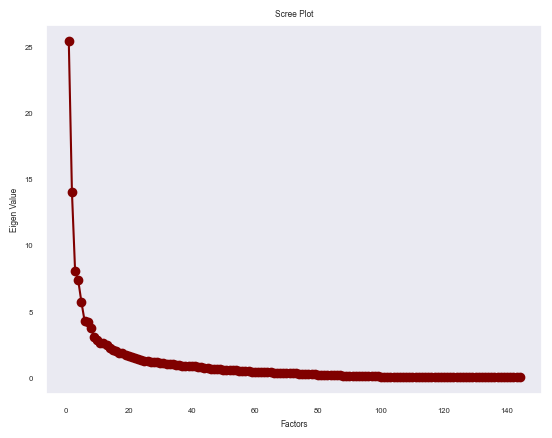

In [71]:
#scree plot to find number of factors 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=x_train.shape[1])
fa.fit(x_train)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,x_train.shape[1]+1),ev, c = 'maroon')
plt.plot(range(1,x_train.shape[1]+1),ev, c = "maroon")
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [72]:
#factor analysis with 15 factors
fa = FactorAnalyzer()
fa.set_params(n_factors=15, rotation='varimax')
fa.fit(x_train)
loadings = pd.DataFrame(fa.loadings_)
#build data frame for factors
loadings.index = macro_dat.columns

In [73]:
#regress on factors to predict the GDP 
x_train = loadings.iloc[:143, :]
y_train = loadings.iloc[143, :]
x_train = x_train.T

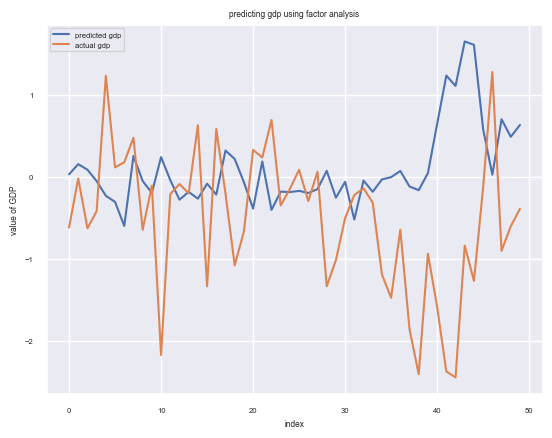

In [74]:
import warnings 
warnings.filterwarnings("ignore")

reg_mod = LinearRegression()
reg_mod.fit(x_train, y_train)
x_test_reduced = pd.DataFrame(x_test).iloc[:, 0:143]

#calculation for actual and predicted values
preds = reg_mod.predict(x_test_reduced)
actual_gdp = pd.DataFrame(x_test).iloc[:, 143]

#plotting both 
plt.plot(preds, label = 'predicted gdp')
plt.plot(actual_gdp, label = 'actual gdp')
plt.xlabel('index')
plt.ylabel('value of GDP')
plt.title('predicting gdp using factor analysis')
plt.legend()
plt.show()